### Problem 1: Business Part (20 points)
As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve. Why the problem is important to solve? Why you believe you could make a big difference with data science technology. How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

##**1) Why is your business problem?**


Buying a house is the most important decision that anyone of us could make. It's a commitment of a mortgage of around 20-30 years. Houses are also the most valuable asset that the average person could have. However, it's very difficult to know:

**A.which areas where properties historically and in the future appreciate the most?**

**B.Which areas are expected to decrease in value to avoid?**

**C.Which areas will be expected to have the highest return on investment if the economy is booming?**

**D.What future return on investment is expected in poor economy?**


#**2) Why is the problem important to solve?** 

It's very important to buy a house in an area that is expected to have highest percentage of appreciation to protect our investments and minimize future risks as much as possible since commitment to mortgages takes around 20-30 years.


##**3) What is your idea to solve the problem?**


Our idea is to look into the historical average price of different types of properties in every zipcode in the north eastern states of the United States. Then we will try to predict the future prices, historical and future return on investment rate, and then displaying it on the map so that we help the user to make an informed decision when buying the house.

##**4) What differences could you make with your data science approach?**

We expect people who buy a house with the help of our project would minimize future risks greatly, and we expect their houses to be a lot more valuable in the future over someone who didn't look at the historical and predicted return on investment rates.


##**5) Why do you believe the idea deserves the investment of the "Shark Tank"?**

Most people will buy homes at some point in their lives. Since we are providing a unique service that shows the expected return on investment of every zipcode/city/county then people would be really interested in knowing this information. It will make them happier and wealthier since they now know they bought in an area with great return on investment.

### Problem 2: Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.

**Insert your answers here**

**1) Problem formulation in Math:**

What is the expected return on investment of a particular area for the next 5 years? ROI(zipcode,2025)?

What is the expected maximum return on investment of particular area for the next 5 years? ROI_highest(zipcode,2025)

What is the minimum expected return on investment of particular area for the next 5 years? ROI_lowest(zipcode,2025)

What is the expected yearly cumlative growth rate of a particular area for the next 5 years? CAGR(zipcode,2025) ?

What is the expected maximum yearly cumlative growth rate of a particular area for the next 5 years? CAGR_highest(zipcode,2025) ?

What is the expected minimum yearly cumlative growth rate of a particular area for the next 5 years? CAGR_lowest(zipcode,2025) ?

**2) Math Solution:**

**ROI(zipcode,2025) =** (zipcode_average_price_in_2025 - zipcode_average_price_in_2020) / zipcode_average_price_in_2020

**ROI_highest(zipcode,2025) =** (zipcode_**maximum**_average_price_in_2025 - zipcode_average_price_in_2020) / zipcode_average_price_in_2020

**ROI_minimum(zipcode,2025) =** (zipcode_**minimum**_average_price_in_2025 - zipcode_average_price_in_2020) / zipcode_average_price_in_2020


**CAGR(zipcode,2025) =** ((zipcode_average_price_in_2025 / zipcode_average_price_in_2020) ^ (1/5))-1

**CAGR_highest(zipcode,2025) =** ((zipcode_**maximum**_average_price_in_2025 / zipcode_average_price_in_2020) ^ (1/5))-1

**CAGR_highest(zipcode,2025) =** ((zipcode_**minimum**_average_price_in_2025 / zipcode_average_price_in_2020) ^ (1/5))-1

**3) Implementation of the Solution**

1. Collect properties historical data about the zipcode from Zillow.
2. Predict future maximum,minimum, and average future prices using Facebook Prophet library
3. Calculate ROI(zipcode,2025), ROI_highest(zipcode,2025), ROI_minimum(zipcode,2025), CAGR(zipcode,2025), CAGR_highest(zipcode,2025), CAGR_highest(zipcode,2025) from data collected in step 1 & 2.


### Problem 3: Computer Part  (20 points)

1) Data Collection

In [33]:
#For this homework, we have actually used Google Colab instead of jupyter
#Because some of us had trouble installing the Facebook Prophet library
#However, it's included by default in google colab
#In addition, google colab uses the same structure as jupyter so this file
#should run exactly the same on jupyter as long as the required libraries are installed
import pandas as pd
from fbprophet import Prophet
from google.colab import drive 
import numpy as np
#Since we are using google colab, we have used google drive to store data
drive.mount('/content/gdrive')
folder='allhomes'
df2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/'+folder+'.csv')
#We will read data from 7 different files, we could of combined all files into one
#or we could of created a loop here. However, since we are using google colab
#the best idea was to run computations for 5 files simultaneously
#we used this same file but ran it into 5 different instances
#with different file paths. Google colab limits 2 processors
#for each instance with limit of 5 instances. if we are using loop
#then we are using 1 instance with 2 processors. but running 5 at the same time then
#we will be using 10 processors which is great for maximizing the
#use of resources and calculating faster
df2=df2.drop(labels=['StateName','City','Metro','CountyName'],axis=1)
df2.describe()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Zipcode     1/31/1996  ...     2/29/2020     3/31/2020
count  30497.000000  1.328000e+04  ...  3.049700e+04  3.049700e+04
mean   48755.743188  1.243820e+05  ...  2.270636e+05  2.279011e+05
std    27445.433155  8.207894e+04  ...  2.322581e+05  2.337225e+05
min      501.000000  1.067700e+04  ...  1.137200e+04  1.149200e+04
25%    25849.000000  7.159750e+04  ...  1.062150e+05  1.064610e+05
50%    48306.000000  1.064920e+05  ...  1.651380e+05  1.656810e+05
75%    71724.000000  1.551022e+05  ...  2.648540e+05  2.658060e+05
max    99929.000000  1.750881e+06  ...  6.495813e+06  6.612392e+06

[8 rows x 292 columns]

In [34]:
print(df2.shape)
df2=df2[df2['Zipcode'].isnull()==False] #make sure we don't have data with empty zipcodes
df2=df2[df2['State'].isin(["MA",'NY','RI','NH','ME','CT','NJ','VT'])] #collect data about those states only
df2=df2.drop(labels=['State'],axis=1) # no need to keep the state column
print(df2.shape)
#4074 total zipcodes in those states in this file

(30497, 293)
(4074, 292)


In [35]:
#Transform columns of dates and prices to rows
#dates and values were horizontal like this:
# 01/1996  02/1996  03/1996 etc up to 3/2020
# 10000.0  11000.0  12000.0 etc
#
#Facebook Prophet doesn't accept that, it need them vertical
#so the simple and amazing command below will transform it into
#  date      price
# 01/1996   10000.0
# 02/1996   11000.0
# etc
df=pd.melt(df2, id_vars=['Zipcode'], var_name="date",value_name="price")
print(df.shape)


(1185534, 3)


In [36]:
#drop rows that have missing price values
df=df.dropna()
print(df.shape)

(1067238, 3)


In [37]:
df.describe(include="all")
df.head(10)

Zipcode       date     price
0     10025  1/31/1996  222928.0
1     10023  1/31/1996  249810.0
3     11226  1/31/1996  175147.0
4     10467  1/31/1996   66967.0
5     10016  1/31/1996  185006.0
6     11201  1/31/1996  170943.0
7     11235  1/31/1996  101171.0
8     11375  1/31/1996  118144.0
9     10009  1/31/1996  201467.0
10    10011  1/31/1996  201269.0

In [38]:
#We have to rename the columns to ds for dates and y for prices
#it's a requirment by facebook prophet
df=df.rename(columns={'date':'ds','price':'y'})
df.head(10)

Zipcode         ds         y
0     10025  1/31/1996  222928.0
1     10023  1/31/1996  249810.0
3     11226  1/31/1996  175147.0
4     10467  1/31/1996   66967.0
5     10016  1/31/1996  185006.0
6     11201  1/31/1996  170943.0
7     11235  1/31/1996  101171.0
8     11375  1/31/1996  118144.0
9     10009  1/31/1996  201467.0
10    10011  1/31/1996  201269.0

In [39]:
#We have to fit by each zipcode
zipcodes=df.groupby(by="Zipcode")
print("Number of zipcodes=",len(zipcodes))

Number of zipcodes= 4074


In [40]:
len(zipcodes.groups.keys())

4074

In [56]:
fcst.tail(10)

ds          trend  ...  multiplicative_terms_upper           yhat
286 2019-11-30  515891.239612  ...                         0.0  516296.217218
287 2019-12-31  517486.973474  ...                         0.0  517194.326796
288 2020-01-31  519082.707336  ...                         0.0  518445.361479
289 2020-02-29  520575.490626  ...                         0.0  520019.252468
290 2020-03-31  522171.224488  ...                         0.0  522341.472372
291 2020-12-31  536326.928102  ...                         0.0  537554.958059
292 2021-12-31  555115.407445  ...                         0.0  555845.931855
293 2022-12-31  573903.886788  ...                         0.0  574127.225495
294 2023-12-31  592692.366131  ...                         0.0  592399.719453
295 2024-12-31  611532.320759  ...                         0.0  612760.350716

[10 rows x 16 columns]

#**2) Implement a small demo/prototype/experiment result figures for the "product" of your data science company. You could use this demo during the pitch**

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2015-03-31 18:54:00 and 2015-07-01 02:21:18



Predictions for zipcode 02131:

Expected future average 5 years return on investment= 29.45 %
The maximum expected return on investment in 5 years = 39.300000000000004 %
The minimum expected return on investment in 5 years = 20.119999999999997 %

Average yearly cumulative investment growth expected for the next 5 years = 5.3 %
The highest yearly cumulative growth expected for the next 5 years= 6.85 %
The lowest yearly cumulative growth expected for the next 5 years= 3.73 %

Prediction Accuracy= 89.78 %

Best time to sell a house in this area is in February.
Best time to buy a house in this area is in late January, Early March, April, Late in May and December


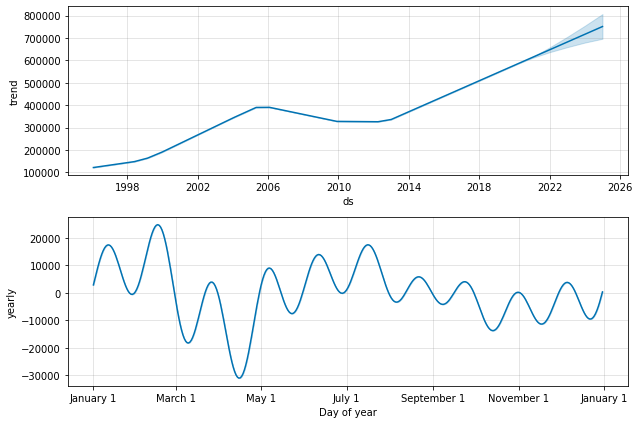

In [67]:
from fbprophet.diagnostics import cross_validation,performance_metrics

temp=zipcodes.get_group(2131) #data don't have a zero on the left
group=temp
m = Prophet(interval_width=0.8)#we have tried multiple parameters but actually facebook prophet
#default parameters suprisingly were the best !
#will explain all those codes in details in the sections below this one
m.fit(temp)
future = m.make_future_dataframe(periods=5,freq="y")
fcst = m.predict(future)
fig = m.plot_components(fcst)
years_to_train=np.round(((fcst.shape[0]-72)/12))
horizon=str(years_to_train/4)+" y"
df_cv = cross_validation(m,initial=str(years_to_train)+" y" ,period='0.25 y',horizon = horizon)
df_p = performance_metrics(df_cv)
def CAGR(first, last, periods):
  return np.round( ((last/first)**(1/periods)-1),4)
def ROI(old,new):
  return np.round(((new-old)/old),4)
yhat={}
yhat={
    'first'     :fcst['yhat'].iloc[-8],        'last'       :fcst['yhat'].iloc[-1],
    'last_lower':fcst['yhat_lower'].iloc[-1]  ,'last_upper' :fcst['yhat_upper'].iloc[-1]
      }
print("\nPredictions for zipcode 02131:\n")
print("Expected future average 5 years return on investment=",ROI(yhat['first'],yhat['last'])*100,"%")
print("The maximum expected return on investment in 5 years =",ROI(yhat['first'],yhat['last_upper'])*100,"%")
print("The minimum expected return on investment in 5 years =",ROI(yhat['first'],yhat['last_lower'])*100,"%")                                                                                                                 
print("\nAverage yearly cumulative investment growth expected for the next 5 years =",np.round(CAGR(yhat['first'],yhat['last'],5)*100,2),"%")
print("The highest yearly cumulative growth expected for the next 5 years=",np.round(CAGR(yhat['first'],yhat['last_upper'],5)*100,2),"%")    
print("The lowest yearly cumulative growth expected for the next 5 years=",np.round(CAGR(yhat['first'],yhat['last_lower'],5)*100,2),"%")       
mape=df_p['mape'].iloc[-1]
print("\nPrediction Accuracy=",np.round((1-mape)*100,2),'%\n')
print("Best time to sell a house in this area is in February.\nBest time to buy a house in this area is in late January, Early March, April, Late in May and December")

### Problem 4: Prepare your slides and *Present* it in the class (20 points)

1) Prepare the slide(s) for the presentation (10 points)

2) Present it in the class (10 points).

In [25]:
#We have to make an empty dataframe to fill the predictions in it
#we chose 5 years because prediction errors increases a lot with more years

future = m.make_future_dataframe(periods=5,freq="y")
future.tail(15)

ds
281 2019-06-30
282 2019-07-31
283 2019-08-31
284 2019-09-30
285 2019-10-31
286 2019-11-30
287 2019-12-31
288 2020-01-31
289 2020-02-29
290 2020-03-31
291 2020-12-31
292 2021-12-31
293 2022-12-31
294 2023-12-31
295 2024-12-31

In [26]:
#magic
#yhat is the prediction
fcst = m.predict(future)
fcst

ds          trend  ...  multiplicative_terms_upper           yhat
0   1996-01-31  111594.877117  ...                         0.0  111540.517743
1   1996-02-29  111808.569415  ...                         0.0  112017.856052
2   1996-03-31  112036.999112  ...                         0.0  112543.823689
3   1996-04-30  112258.060109  ...                         0.0  112355.278490
4   1996-05-31  112486.489806  ...                         0.0  112560.231020
..         ...            ...  ...                         ...            ...
291 2020-12-31  295288.514900  ...                         0.0  295270.570420
292 2021-12-31  310035.176522  ...                         0.0  310051.322791
293 2022-12-31  324781.838144  ...                         0.0  324829.538046
294 2023-12-31  339528.499765  ...                         0.0  339605.191152
295 2024-12-31  354315.563200  ...                         0.0  354297.618719

[296 rows x 16 columns]

In [12]:
fcst.shape

(296, 16)

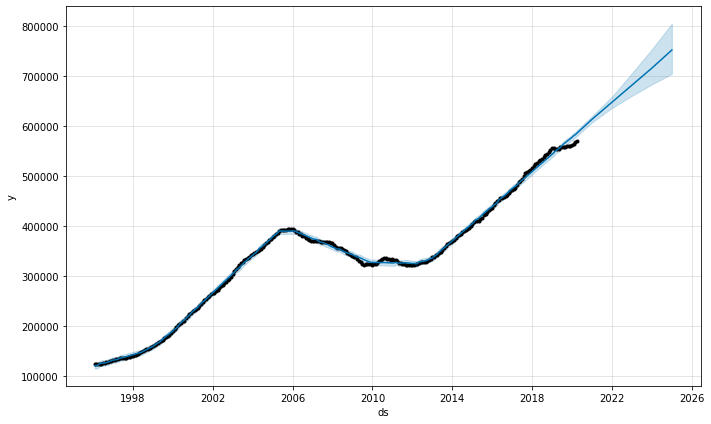

In [66]:
fig = m.plot(fcst)
#black is real data, after that it's a prediction

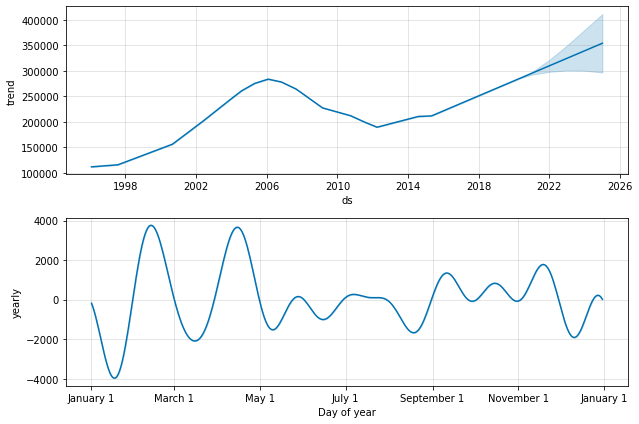

In [14]:
fig = m.plot_components(fcst)
#January is the best time to buy a house since it's valued the lowest at that time
#Feburary and April seem to be the best time to sell a house?!


In [15]:
from fbprophet.diagnostics import cross_validation
#We want to test the predictions so training data will be 
#all years from 1996 up to 2014
#Then test predictions for every year after that
#rest is for testing
years_to_train=np.round(((fcst.shape[0]-72)/12))
horizon=str(years_to_train/4)+" y"
#print(years_to_train)
df_cv = cross_validation(m,initial=str(years_to_train)+" y" ,period='0.25 y',horizon = horizon)
df_cv.head(200)
#yhat is the predicted price
#y is the true price from our data

INFO:fbprophet:Making 2 forecasts with cutoffs between 2015-03-31 18:54:00 and 2015-07-01 02:21:18


ds           yhat  ...         y              cutoff
0   2015-04-30  210561.946012  ...  212184.0 2015-03-31 18:54:00
1   2015-05-31  210444.545251  ...  213483.0 2015-03-31 18:54:00
2   2015-06-30  210625.027950  ...  214239.0 2015-03-31 18:54:00
3   2015-07-31  211088.369722  ...  214810.0 2015-03-31 18:54:00
4   2015-08-31  211354.169227  ...  215082.0 2015-03-31 18:54:00
..         ...            ...  ...       ...                 ...
108 2019-11-30  237898.836048  ...  277882.0 2015-07-01 02:21:18
109 2019-12-31  238372.476012  ...  279783.0 2015-07-01 02:21:18
110 2020-01-31  238501.330893  ...  281766.0 2015-07-01 02:21:18
111 2020-02-29  239319.216725  ...  284243.0 2015-07-01 02:21:18
112 2020-03-31  239351.105203  ...  287746.0 2015-07-01 02:21:18

[113 rows x 6 columns]

In [16]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(200)
#Mape is the error percentage
#it start with 0.9% which is excellent but expected.
#for longer prediction periods the error percentage increase as follow:
#1 year  prediction mape=2.8 % accuracy => 100-2.8=97.2
#2 years prediction mape=7.2 % accuracy => 100-7.2.8=92.8
#3 years prediction mape=12.8% accuracy => 100-12.8=87.2
#4 years prediction mape=14.7% accuracy => 100-14.7=85.3
#5 years prediction mape=16.2% accuracy => 100-16.2=83.8
#should be different for every zipcode
#if we expect a cumlative growth to be 5% for 5 years, then the error percentage is + or - 0.81% which is fine I think
#RMSE is great too. it's at 1.2% error percentage
#but it increase to 15.7% at the end
#we feel this is acceptable for 5 years

horizon           mse  ...     mdape  coverage
0    182 days 05:06:00  6.779962e+06  ...  0.007645  1.000000
1    182 days 21:38:42  6.542375e+06  ...  0.005403  1.000000
2    213 days 05:06:00  8.405900e+06  ...  0.014233  1.000000
3    213 days 21:38:42  7.606507e+06  ...  0.005403  1.000000
4    242 days 21:38:42  8.954564e+06  ...  0.016869  1.000000
..                 ...           ...  ...       ...       ...
98  1674 days 05:06:00  1.891028e+09  ...  0.168692  0.454545
99  1674 days 21:38:42  1.871485e+09  ...  0.153548  0.545455
100 1703 days 21:38:42  1.932898e+09  ...  0.158047  0.545455
101 1704 days 05:06:00  1.971357e+09  ...  0.158047  0.545455
102 1734 days 21:38:42  2.058644e+09  ...  0.168186  0.545455

[103 rows x 7 columns]

In [17]:
fcst

ds          trend  ...  multiplicative_terms_upper           yhat
0   1996-01-31  111594.877117  ...                         0.0  111540.517743
1   1996-02-29  111808.569415  ...                         0.0  112017.856052
2   1996-03-31  112036.999112  ...                         0.0  112543.823689
3   1996-04-30  112258.060109  ...                         0.0  112355.278490
4   1996-05-31  112486.489806  ...                         0.0  112560.231020
..         ...            ...  ...                         ...            ...
291 2020-12-31  295288.514900  ...                         0.0  295270.570420
292 2021-12-31  310035.176522  ...                         0.0  310051.322791
293 2022-12-31  324781.838144  ...                         0.0  324829.538046
294 2023-12-31  339528.499765  ...                         0.0  339605.191152
295 2024-12-31  354315.563200  ...                         0.0  354297.618719

[296 rows x 16 columns]

In [18]:
#calculating cumulative growth (CAGR)
#formula=[(last year value/first year value)^(1/number of years)] - 1
#ROI Formula= (last year value-first year value)/first year value
def CAGR(first, last, periods):
  return np.round( ((last/first)**(1/periods)-1),4)
def ROI(old,new):
  return np.round(((new-old)/old),4)

yhat={}
yhat={
    'first':fcst['yhat'].iloc[-6],'first_lower'  :fcst['yhat_lower'].iloc[-6],  'first_upper':fcst['yhat_upper'].iloc[-6],
    'last' :fcst['yhat'].iloc[-1],'last_lower'   :fcst['yhat_lower'].iloc[-1]  ,'last_upper' :fcst['yhat_upper'].iloc[-1]
      }                                                                                                           
print("Average cumulative investment growth expected for the 5 years predicted=",CAGR(yhat['first'],yhat['last'],5)*100,"%") #Average
print("The highest cumulative growth expected for the next 5 years=",CAGR(yhat['first_upper'],yhat['last_upper'],5)*100,"%")      #Excellent economy?
print("The lowest cumulative growth expected for the next 5 years=",CAGR(yhat['first_lower'],yhat['last_lower'],5)*100,"%")       #Bad economy?
print("Expected average 5 years return on investment=",ROI(yhat['first'],yhat['last'])*100,"%")
print("The maximum expected return on investment in 5 years =",ROI(yhat['first_upper'],yhat['last_upper'])*100,"%")
print("The minimum expected return on investment in 5 years =",ROI(yhat['first_lower'],yhat['last_lower'])*100,"%")

Average cumulative investment growth expected for the 5 years predicted= 4.47 %
The highest cumulative growth expected for the next 5 years= 7.539999999999999 %
The lowest cumulative growth expected for the next 5 years= 1.04 %
Expected average 5 years return on investment= 24.45 %
The maximum expected return on investment in 5 years = 43.84 %
The minimum expected return on investment in 5 years = 5.3100000000000005 %


In [19]:
mape=df_p['mape'].iloc[-1]
print("Accuracy=",(1-mape)*100)

Accuracy= 83.73982016304602


In [0]:
m.growth

'linear'

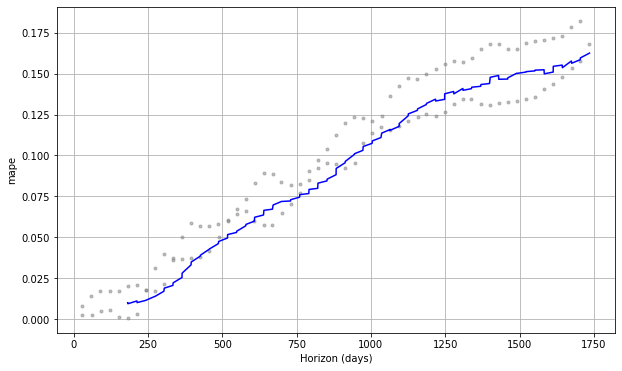

In [20]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
#Blue is MAPE
#grey dots show the absolute percent error for each prediction

In [22]:
#Now to make predictions for every zipcode
#we have to fit the model for everyone of them
#then saving it to excel and combine it later
#we are saving every zipcode to a file because google colab sometimes 
#crashes and we don't want to waste time by calculating again
#so if it crashes we will continue from the last zipcode we calculated
import os.path
from os import path
temp=pd.DataFrame()
yhat={}

for name,group in zipcodes:
  # if we don't have at least 5 years of historical data for this zipcode then skip
  if group.shape[0] <60: continue 
  #If we already created the file then skip
  if path.exists("/content/gdrive/My Drive/Colab Notebooks/zipcodes/"+folder+"/"+str(name)+".csv"):continue
  m = Prophet(interval_width=0.8)
  m.fit(group)
  future = m.make_future_dataframe(periods=5,freq="y")
  fcst = m.predict(future)
  years_to_train=(np.round((fcst.shape[0]-60)/12))
  horizon=str((years_to_train/5))+" y"
  df_cv = cross_validation(m,initial=str(years_to_train)+" y" ,period='0.25 y',horizon = horizon)
  yhat={
    'first':fcst['yhat'].iloc[-6],'last' :fcst['yhat'].iloc[-1],
    'last_lower'   :fcst['yhat_lower'].iloc[-1]  ,'last_upper' :fcst['yhat_upper'].iloc[-1]}
  df_p = performance_metrics(df_cv)
  mape=df_p['mape'].iloc[-1]
  print("CAGR for zipcode:",str(name),"=",CAGR(yhat['first'],yhat['last'],5)*100,'% Average 5 years return on investment=',ROI(yhat['first'],yhat['last'])*100,'%,Accuracy=',(1-mape)*100,"%")
  fcst=fcst.tail(5) # we want only our predictions from this table
  fcst['CAGR']=CAGR(yhat['first'],yhat['last'],5)*100
  fcst['CAGR_lower']=CAGR(yhat['first'],yhat['last_lower'],5)*100
  fcst['CAGR_upper']=CAGR(yhat['first'],yhat['last_upper'],5)*100
  fcst['ROI']=ROI(yhat['first'],yhat['last'])*100
  fcst['ROI_lower']=ROI(yhat['first'],yhat['last_lower'])*100
  fcst['ROI_upper']=ROI(yhat['first'],yhat['last_upper'])*100
  fcst=fcst.drop(columns=['additive_terms','additive_terms_lower', 'additive_terms_upper','yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms','multiplicative_terms_lower', 'multiplicative_terms_upper',],axis=1)
  fcst['mape']=mape
  fcst['zipcode']=name
  #since we already have the file that has all historical zipcodes data
  #then I am saving predictions only to a seperate file
  #after the loop finishes I will  make code to combine all of them
  #into 1 file, then it should be ready for tableau
  fcst.to_csv("/content/gdrive/My Drive/Colab Notebooks/zipcodes/"+folder+"/"+str(name)+".csv")
  



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000


CAGR for zipcode: 5031 = 6.529999999999999 % Average 5 years return on investment= 37.18 %,Accuracy= 92.6771485043934 %


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5034 = 5.0200000000000005 % Average 5 years return on investment= 27.74 %,Accuracy= 95.23926206645316 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5050 = 1.3299999999999998 % Average 5 years return on investment= 6.83 %,Accuracy= 95.73187311678166 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5052 = -1.6400000000000001 % Average 5 years return on investment= -7.93 %,Accuracy= 90.35582870373393 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000


CAGR for zipcode: 5059 = -0.67 % Average 5 years return on investment= -3.3099999999999996 %,Accuracy= 96.60670761465411 %


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 12 forecasts with cutoffs between 2015-09-12 03:31:08.400000 and 2018-06-12 13:31:26.400000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5067 = 6.69 % Average 5 years return on investment= 38.21 %,Accuracy= 92.3711728451799 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5071 = 3.83 % Average 5 years return on investment= 20.669999999999998 %,Accuracy= 90.99287354230313 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5083 = 4.16 % Average 5 years return on investment= 22.63 %,Accuracy= 90.61782872100878 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5088 = 0.6799999999999999 % Average 5 years return on investment= 3.46 %,Accuracy= 90.9275946095506 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5141 = 7.08 % Average 5 years return on investment= 40.8 %,Accuracy= 96.00005490785945 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5254 = 0.5 % Average 5 years return on investment= 2.52 %,Accuracy= 95.5323659452914 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5344 = 3.2399999999999998 % Average 5 years return on investment= 17.28 %,Accuracy= 95.13398138932897 %


INFO:fbprophet:Making 12 forecasts with cutoffs between 2016-04-18 07:00:39.600000 and 2019-01-17 17:00:57.600000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5358 = 1.59 % Average 5 years return on investment= 8.23 %,Accuracy= 94.2771818125217 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5362 = 2.18 % Average 5 years return on investment= 11.39 %,Accuracy= 97.00495574434966 %


INFO:fbprophet:Making 13 forecasts with cutoffs between 2016-03-31 00:43:12 and 2019-03-31 18:10:48
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5405 = 3.93 % Average 5 years return on investment= 21.279999999999998 %,Accuracy= 93.61422991797401 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5460 = 3.02 % Average 5 years return on investment= 16.02 %,Accuracy= 97.20487813063443 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5469 = 5.0 % Average 5 years return on investment= 27.66 %,Accuracy= 86.60245798342669 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5470 = -1.27 % Average 5 years return on investment= -6.21 %,Accuracy= 95.0520522397015 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5664 = 6.02 % Average 5 years return on investment= 33.98 %,Accuracy= 97.25873029669091 %


INFO:fbprophet:Making 16 forecasts with cutoffs between 2016-02-05 05:50:49.200000 and 2019-11-05 21:40:19.200000
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5740 = 3.29 % Average 5 years return on investment= 17.549999999999997 %,Accuracy= 98.48586041154118 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5768 = 4.2 % Average 5 years return on investment= 22.84 %,Accuracy= 91.27038422242086 %


INFO:fbprophet:Making 12 forecasts with cutoffs between 2015-11-24 04:40:58.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5825 = 4.43 % Average 5 years return on investment= 24.21 %,Accuracy= 96.21738698855734 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5826 = 3.9600000000000004 % Average 5 years return on investment= 21.45 %,Accuracy= 95.9702845311914 %


INFO:fbprophet:Making 13 forecasts with cutoffs between 2015-03-31 18:54:00 and 2018-03-31 12:21:36
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5827 = 2.64 % Average 5 years return on investment= 13.91 %,Accuracy= 97.38448996887402 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5833 = 3.84 % Average 5 years return on investment= 20.73 %,Accuracy= 96.17380435399325 %


INFO:fbprophet:Making 13 forecasts with cutoffs between 2016-03-31 00:43:12 and 2019-03-31 18:10:48
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5841 = 1.96 % Average 5 years return on investment= 10.209999999999999 %,Accuracy= 97.97673325282872 %


INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-02-23 12:08:16.800000 and 2018-08-24 14:41:16.800000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5850 = 3.81 % Average 5 years return on investment= 20.54 %,Accuracy= 95.72751493606 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-03-12 18:25:44.400000 and 2018-06-12 13:31:26.400000
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CAGR for zipcode: 5904 = -0.29 % Average 5 years return on investment= -1.46 %,Accuracy= 98.21475284301708 %


INFO:fbprophet:Making 10 forecasts with cutoffs between 2016-05-24 19:35:34.800000 and 2018-08-24 14:41:16.800000


CAGR for zipcode: 5907 = 2.69 % Average 5 years return on investment= 14.2 %,Accuracy= 91.7214667500117 %


In [81]:
#I have created this file originally in a seperate file
#but I have put it here for submission
#its purpose is to first combine all zipcodes per category
#into 1 file. so we will have 7 files since we have 7 categories
#then we combine all 7 into 1 file
#we had to save multiple files because of google colab crashings and runtime time limits 
#so we continue from where it crashed
import pandas as pd
from google.colab import drive 
import numpy as np
import os
import os.path as ospath
drive.mount('/content/gdrive')

path="/content/gdrive/My Drive/Colab Notebooks/zipcodes/"
folders=['allhomes','1bed','3bed','2bed','condos','rent','singlefamily']

for folder in folders:
  all_files=[]
  if ospath.exists(path+'final/'+folder+"_combined_final.csv"):
    print("we have created data for "+folder+" before ! skipping ...")
    continue
  for file in os.listdir(path+folder):
      if file.endswith(".csv"):
        all_files.append(os.path.join(path+folder, file))
  print('Number of files/zipcodes in '+folder+':',len(all_files))
  df_pred=""
  df_pred = pd.concat((pd.read_csv(f,low_memory=False).assign(category=folder) for f in all_files),ignore_index=True)
  try:#some files have index column by mistake
    df_pred=df_pred.drop(columns='Unnamed: 0')
  except:
    pass
  print(folder," shape=",df_pred.shape)
  print("Unique zipcodes in ",folder,"=",df_pred['zipcode'].nunique())
  frame_pred = df_pred.copy(True) #saving a copy
  frame_pred=frame_pred[['ds','zipcode','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper','CAGR','CAGR_lower','CAGR_upper','ROI','ROI_lower','ROI_upper','mape','category']]
  frame_pred.head(10)
  frame_pred.to_csv(path+"final/"+folder+"_predictionsOnly.csv")
  df_historical = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/'+folder+'.csv').assign(category=folder) #historical data
  

  print(folder," historical data shape=",df_historical.shape)
  df_historical=df_historical[df_historical['State'].isin(["MA",'NY','RI','NH','ME','CT','NJ','VT'])]

  try:
    df_historical=df_historical[df_historical['Zipcode'].isnull()==False]
  except:
    df_historical=df_historical[df_historical['RegionName'].isnull()==False]
   
  try:
    df_historical=df_historical.drop(labels=['StateName'],axis=1) # no need to keep the state column
  except:
    pass
  print(folder," shape after choosing only 8 states=",df_historical.shape)
  
  frame_historical=df_historical.copy(True)
  try:#not all files have those columns
    frame_historical=frame_historical.drop(columns=['RegionID','SizeRank','RegionType'],axis=1)
    frame_historical=frame_historical.rename(columns={'RegionName':'Zipcode'})
  except:
    try:
      frame_historical=frame_historical.drop(columns=['RegionID','SizeRank'],axis=1)
      frame_historical=frame_historical.rename(columns={'RegionName':'Zipcode'})
    except:
      pass
    
#######

  extra_information=frame_historical[['Zipcode','State','City','Metro','CountyName']] # we need to add those to the predictions frame
  extra_information=extra_information.rename(columns={'Zipcode':'zipcode'})
  frame_pred=frame_pred.merge(extra_information,on=['zipcode'])
  frame_historical=pd.melt(frame_historical, id_vars=['Zipcode','State','City','Metro','CountyName','category'], var_name="date",value_name="price")
  frame_historical=frame_historical.rename(columns={"Zipcode": "zipcode","date": "ds","price": "yhat"})
  combined=frame_pred.copy(True)
  zips_we_predicted=frame_pred.zipcode.unique()
  print("Number of zips we predicted for ",folder,"=",len(zips_we_predicted))
  combined=pd.merge(frame_pred,frame_historical,on=['zipcode','ds','yhat','State','City','Metro','CountyName','category'],how='outer')
  final=combined[combined['zipcode'].isin(zips_we_predicted)] # get only the zipcodes we computed
  final['ds']=pd.to_datetime(final.ds).copy(True)
  final.sort_values(by=['zipcode','ds'],inplace=True)
  print(folder,' final shape=',final.shape)
  print(folder,' zipcodes predicted=',final['zipcode'].nunique())
  frame_historical.to_csv(path+'final/'+folder+'_historical_only.csv')
  final.to_csv(path+'final/'+folder+'_combined_final.csv')
  print('saved ',folder,' successfully!')
## combining all files into one
all_files=[path+"final/"+f+'_combined_final.csv' for f in folders]
df = pd.concat((pd.read_csv(f,low_memory=False) for f in all_files),ignore_index=True)
df=df.dropna(subset=['yhat',])
df.to_csv(path+"final/final.csv")
print("Done!!!")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
we have created data for allhomes before ! skipping ...
we have created data for 1bed before ! skipping ...
we have created data for 3bed before ! skipping ...
we have created data for 2bed before ! skipping ...
we have created data for condos before ! skipping ...
we have created data for rent before ! skipping ...
we have created data for singlefamily before ! skipping ...
Done!!!
